**Supervised Learning using Label Propagation**

Aim:

The objective is to implement Label Propagation, a semi-supervised learning technique that propagates label information through a graph structure.

The algorithm is useful when only a small portion of the data is labeled while the rest remains unlabeled.



Scenario:

You are given a dataset containing customer purchase behaviors, where only a few samples are labeled with either **"High Spender"** (1) or **"Low Spender" (0)**.

Your task is to use Label Propagation to predict the labels for the unlabeled data points.

1. **Import Required Libraries**

**NumPy (numpy)**: Used for numerical operations.

**Pandas (pandas)**: (Not used directly but imported) Usually used for data handling.

**Matplotlib (matplotlib.pyplot)**: Used for plotting the dataset visualization.

**LabelPropagation (sklearn.semi_supervised)**: A semi-supervised learning algorithm that propagates labels to unlabeled data.

**make_moons (sklearn.datasets)**: Generates a synthetic dataset for classification problems.

**train_test_split (sklearn.model_selection)**: Splits the dataset into training and testing sets.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelPropagation
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


2. **Generate Synthetic Dataset**
make_moons(n_samples=300, noise=0.1, random_state=42)

Generates 300 samples in a crescent-moon shape
noise=0.1: Adds some noise to make
classification harder.

random_state=42: Ensures reproducibility (same
dataset every time).

In [ ]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)


3. **Split Data into Training and Testing Sets**

Splits the dataset into training (80%) and testing (20%) data.

test_size=0.2: 20% of the data goes into X_test, while 80% remains in X_train.

random_state=42: Ensures that the split is reproducible.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4.**Set 90% of Training Labels as Unlabeled (-1)**

Creates a new label array y_train_labels filled with -1 (unlabeled).

Selects 30 random samples from y_train to keep labeled.

Assigns the actual labels to these 30 labeled indices.

The remaining 90% of data remains unlabeled.



In [ ]:
y_train_labels = np.full(y_train.shape, -1)  # Mark all labels as -1 (unlabeled)
labeled_indices = np.random.choice(len(y_train), size=30, replace=False)  # Select 30 labeled points
y_train_labels[labeled_indices] = y_train[labeled_indices]  # Assign true labels to selected indices


5.**Train Label Propagation Model**

LabelPropagation(kernel='knn', n_neighbors=10): Uses K-Nearest Neighbors (KNN) graph for label propagation.

.fit(X_train, y_train_labels): Trains the model
using both labeled and unlabeled data.

The model starts with 30 labeled points.

It propagates labels to the unlabeled points using relationships in the data.

Labels are assigned based on the nearest labeled neighbors.



In [ ]:
label_prop_model = LabelPropagation(kernel='knn', n_neighbors=10)  # Using k-Nearest Neighbors graph
label_prop_model.fit(X_train, y_train_labels)  # Train on semi-supervised data


LabelPropagation(kernel='knn', n_neighbors=10)

6. **Predict Labels for Test Data**

Uses the trained model to predict labels for X_test.

These are compared with y_test to check model performance.

y_pred: Stores the predicted class labels (0 or 1) for each point in X_test.



In [ ]:
y_pred = label_prop_model.predict(X_test)


7. **Visualizing the Data**

i. Create a Figure for Plotting:plt.figure(figsize=(8,6)):
Creates a new figure with a size of 8 inches by 6 inches.

ii. Scatter Plot for Unlabeled Data
X_train[:, 0] and X_train[:, 1]:
Extracts X and Y coordinates from the training data.

c=y_train_labels:

Colors each data point based on its label.
Most of them are -1 (unlabeled), so they appear in a separate color.

cmap='coolwarm':
Uses a red-blue color map to distinguish different classes.

edgecolor='k':
Adds a black border around each point for clarity.

marker='o':Use circle marker for unlabele points.

alpha=0.7:
Sets transparency to 70%, making the plot less cluttered.

label="Unlabeled Data":
Adds this category to the legend.

Step 3: Scatter Plot for Labeled Data

X_train[labeled_indices, 0] and X_train[labeled_indices, 1]:

Extracts X,Y coordinates 30 labeled data points.

c=y_train[labeled_indices]:
Colors these points based on their true class labels (0 or 1).

marker='s':
Uses square markers (s) for labeled points

s=100:
Increases marker size to highlight labeled point

label="Labeled Data":
Adds this category to the legend.



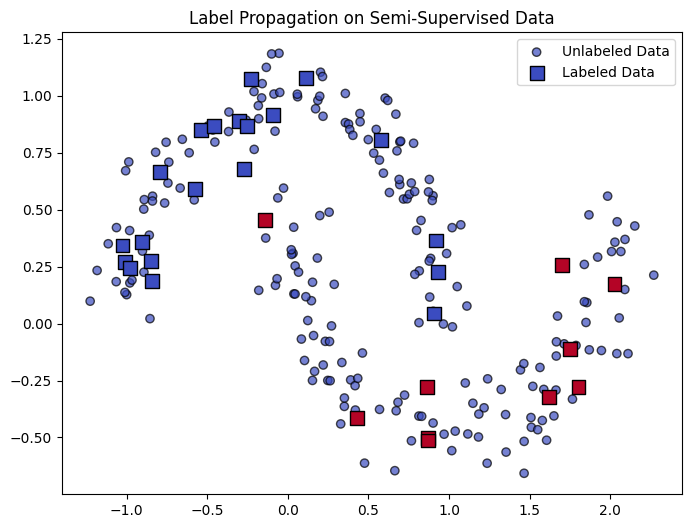

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_labels, cmap='coolwarm', edgecolor='k', marker='o', alpha=0.7, label="Unlabeled Data")
plt.scatter(X_train[labeled_indices, 0], X_train[labeled_indices, 1], c=y_train[labeled_indices], cmap='coolwarm', edgecolor='k', marker='s', s=100, label="Labeled Data")
plt.title("Label Propagation on Semi-Supervised Data")
plt.legend()
plt.show()


8. **Evaluate Model Accuracy**

Compares predicted labels (y_pred) with actual labels (y_test).

Computes accuracy using:
accuracy=(correct predictions/totaltestsamples)

Prints the accuracy.


In [ ]:
accuracy = np.mean(y_pred == y_test)
print(f"Label Propagation Accuracy: {accuracy:.2f}")


Label Propagation Accuracy: 1.00


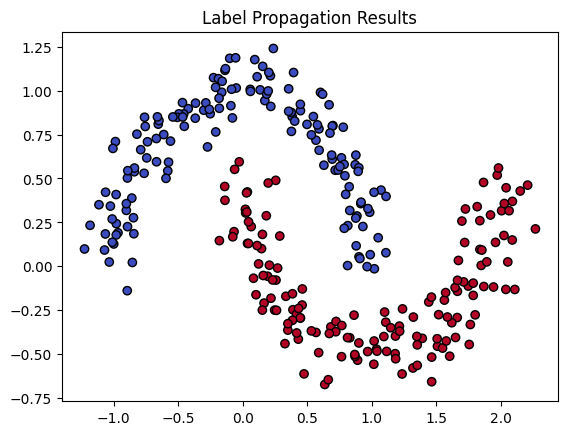

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelPropagation
from sklearn.datasets import make_moons

# Generate a synthetic dataset
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Make 90% of labels unknown (-1)
y_labels = np.full(y.shape, -1)
labeled_indices = np.random.choice(len(y), size=30, replace=False)
y_labels[labeled_indices] = y[labeled_indices]

# Train Label Propagation model
label_prop = LabelPropagation(kernel='knn', n_neighbors=10)
label_prop.fit(X, y_labels)

# Predict labels
y_pred = label_prop.predict(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k')
plt.title("Label Propagation Results")
plt.show()
